In [ ]:
import numpy as np
import networkx as nx
from collections import defaultdict
import time
import math
import random
import matplotlib.pyplot as plt

In [ ]:
!wget https://www.dropbox.com/s/slalpfiuvonzvgi/_sorting_algorithms.so?dl=0 -O _sorting_algorithms.so

--2022-04-01 12:12:27--  https://www.dropbox.com/s/slalpfiuvonzvgi/_sorting_algorithms.so?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/slalpfiuvonzvgi/_sorting_algorithms.so [following]
--2022-04-01 12:12:27--  https://www.dropbox.com/s/raw/slalpfiuvonzvgi/_sorting_algorithms.so
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb736838eb6f5207c67150735cc.dl.dropboxusercontent.com/cd/0/inline/BimmtfKrFu-B1i3zN9Tnrkl4WC_ApJN_FvlopRvK9vubAGuseepAg9UTyevf5ft5Z6LxfbPlpPyNnbxwG41MaY97bJRBjeXBBKll6ZYniCOnZwq2IJnsalxmz7VPOYDV-4_rFqjKqo18DgERT_a5WUCQWEBf2ApHssgO4PtMQ0Ynhw/file# [following]
--2022-04-01 12:12:27--  https://ucb736838eb6f5207c67150735cc.dl.dropboxusercontent.com/cd/0/inline/BimmtfKrFu-B1i3zN9Tnrkl4WC_ApJN_F

In [ ]:
!wget https://www.dropbox.com/s/4zci1uc73za3k02/sorting_algorithms.py?dl=0 -O sorting_algorithms.py

--2022-04-01 12:12:29--  https://www.dropbox.com/s/4zci1uc73za3k02/sorting_algorithms.py?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4zci1uc73za3k02/sorting_algorithms.py [following]
--2022-04-01 12:12:29--  https://www.dropbox.com/s/raw/4zci1uc73za3k02/sorting_algorithms.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc09638ac140408cd3ca4abebc8b.dl.dropboxusercontent.com/cd/0/inline/BilZZcByd_caIrb5pKczr6EunlfdFekW-XPQh5LMrEM4QdKAE5iiMpsqzq23T5AharPvPuj7HxE00VdUihbcGpOiV2ttuNbzYM5arxx2v2zvqeZLUYvVqBhWXSZ11NIj962j89SQx8FNKLmEPVDihtoHZCfHKRGe9st4Z0V9FK0uBA/file# [following]
--2022-04-01 12:12:29--  https://uc09638ac140408cd3ca4abebc8b.dl.dropboxusercontent.com/cd/0/inline/BilZZcByd_caIrb5pKczr6EunlfdFekW-XPQ

In [ ]:
import sorting_algorithms

In [ ]:
vec = sorting_algorithms.intVecVector([[1001, 3, 5], [1001, 3, 4], [922, 4, 6]])

In [ ]:
sorting_algorithms.bucket_sort(vec)

((922, 4, 6), (1001, 3, 5), (1001, 3, 4))

## Генераторы графов

In [ ]:
# функция возвращает случайный простой граф в моделе Gnp 
# вероятность ребра p = 2*m/(n*(n-1)), чтобы среденее число ребер было = m
# структура хранения - список смежности, реализованный через словарь (хеш-таблица) списков 
# ребра представляют собой tuple двух вершин
def get_random_simple_Gnp_graph(n, m, seed=42):
  edge_p = 2*m/(n*(n-1))
  g = nx.random_graphs.fast_gnp_random_graph(n,edge_p,seed)
  
  return nx.convert.to_dict_of_lists(g)

In [ ]:
# функция возвращает случайный ориентированный граф в моделе Gnp 
# вероятность ребра p = m/(n*(n-1)), чтобы среденее число ребер было = m
# структура хранения - список смежности, реализованный через словарь (хеш-таблица) списков 
# ребра представляют собой tuple двух вершин
def get_random_Gnp_digraph(n, m, seed=42):
  edge_p = m/(n*(n-1))
  g = nx.random_graphs.fast_gnp_random_graph(n,edge_p,seed,True)
  
  return nx.convert.to_dict_of_lists(g)

In [ ]:
# функция возвращает случайный простой граф в моделе Gnm 
# структура хранения - список смежности, реализованный через словарь (хеш-таблица) списков 
# ребра представляют собой tuple двух вершин
def get_random_simple_Gnm_graph(n, m, seed=42):
  g = nx.random_graphs.gnm_random_graph(n,m,seed)

  return nx.convert.to_dict_of_lists(g)

In [ ]:
# функция возвращает случайный ориентированный граф в моделе Gnm
# структура хранения - список смежности, реализованный через словарь (хеш-таблица) списков 
# ребра представляют собой tuple двух вершин
def get_random_Gnm_digraph(n, m, seed=42):
  g = nx.random_graphs.gnm_random_graph(n,m,seed,True)

  return nx.convert.to_dict_of_lists(g)

In [ ]:
# функция возвращает связный ориентированный Ейлеров граф
# в графе n вершин, k - параметр, от которого зависти генерация
# структура хранения - список смежности, реализованный через словарь (хеш-таблица) списков 
# ребра представляют собой tuple двух вершин
def get_Euler_digraph(n, k=8):
  in_degs, out_degs = [k]*n, [k]*n 
  G = nx.generators.directed_havel_hakimi_graph(in_degs, out_degs)
  WCCs = list(nx.algorithms.components.weakly_connected_components(G))
  if len(WCCs) > 1:
    connecting_nodes = []
    for WCC in WCCs:
      some_vertex_of_WCC = next(iter(WCC))
      connecting_nodes.append(some_vertex_of_WCC)
    for i in range(1, len(connecting_nodes)):
      G.add_edge(connecting_nodes[i-1],connecting_nodes[i])
      G.add_edge(connecting_nodes[i],connecting_nodes[i-1])
    
  return nx.convert.to_dict_of_lists(G)

In [ ]:
# утилитарная функция, переводящая таплы вида (1, 0, 0, 1)
# в числа, интерпетируя эту запись как число в двоичной записи
# эта функция нужна для следующей функции
def get_index_from_binary(tup):
  n = len(tup)
  mult = 1
  res = 0
  for i in range(n):
    res += tup[i]*mult
    mult *= 2
  return res

# функция возвращает связный ориентированный регулярный Ейлеров граф
# входные и выходные степени всех вершин совпадают и равны half_dim
# число вершин равно 4**half_dim
# структура хранения - список смежности, реализованный через словарь (хеш-таблица) списков 
# ребра представляют собой tuple двух вершин
def get_hypercube_digraph(half_dim):
  G = nx.generators.hypercube_graph(half_dim*2)
  directed_G = nx.DiGraph()
  Euler_circuit_G = nx.algorithms.eulerian_circuit(G)
  for (u,v) in Euler_circuit_G:
    directed_G.add_edge(get_index_from_binary(u), get_index_from_binary(v))
  return nx.convert.to_dict_of_lists(directed_G)

#Алгоритмы сортировки

In [ ]:
def counting_sort(a, ind=None):
  A = [[int(el[ind]), el] for el in a]
  digits = [int(el[ind]) for el in a]
  result = [0 for _ in digits]
  c = [0 for _ in range(max(digits)+1)]
  for el in digits:
    c[el] += 1
  for i in range(1, len(c)):
    c[i] += c[i-1]
  for el in A[::-1]:
    if c[el[0]] > 1:
      pos = c[el[0]] - 1
    else:
      pos = 0
    result[pos] = el[1]
    c[el[0]] -= 1
  return result

In [ ]:
# поразрядная сортировка
# возвращает итоговую перестановку эелементов массива A
# для того, чтобы можно было переставить элементы в любом другом массиве
def radix_argsort(A):
  max_len_of_el = max([len(str(el)) for el in A])
  elements = []
  for el in A:
    elements.append(list(str(el).rjust(max_len_of_el, '0')))
  for i in range(max_len_of_el):
    elements = counting_sort(elements, max_len_of_el - i - 1)
  result = [int(''.join(el)) for el in elements]
  return result

In [ ]:
def insertion_sort(a):
  arr = a.copy()
  for i in range(1, len(arr)):
    key = arr[i]
    j = i-1
    while j >= 0 and key < arr[j]:
      arr[j + 1] = arr[j]
      j -= 1
    arr[j + 1] = key
  return arr

In [ ]:
# карманная сортировка
# возвращает итоговую перестановку эелементов массива A
# для того, чтобы можно было переставить элементы в любом другом массиве
def bucket_argsort(A):
  if len(A) <= 1:
    return A
  n_buckets = len(A)
  buckets = [[] for i in range(n_buckets)] 
  result = []
  if max(A) == 0:
    return A
  for el in A:
    bucket_idx = int((el - min(A)) / max(A) * n_buckets)
    buckets[bucket_idx].append(el) 
  for bucket in buckets:
    bucket = insertion_sort(bucket)
    result.extend(bucket)
  return result

In [ ]:
# быстрая сортировка
# возвращает итоговую перестановку эелементов массива A
# для того, чтобы можно было переставить элементы в любом другом массиве
from random import randint
def partition(A, start, end, pivot):
    i = (start - 1)
    for j in range(start, end):
        if (A[j] <= pivot):
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i + 1], A[end] = A[end], A[i + 1]
    return (i + 1)


def bubble_sort(A, start, end):
  for i in range(start, end):
    for j in range(i, end):
      # print(A[j], A[i])
      if A[i] > A[j]:
        A[i], A[j] = A[j], A[i]
  # print(A)


def quick_argsort(A, start=0, end=None):
  if end == None:
    end = len(A) - 1
  if end - start >= 10:
    pivot_index = randint(start, end)
    lmbd = A[pivot_index]
    new_pos = partition(A, start, end, lmbd)
    quick_argsort(A, start, new_pos)
    quick_argsort(A, new_pos + 1, end)
  else:
    bubble_sort(A, start, end)

Test:

In [ ]:
from IPython.display import clear_output
def bucket_sort_test():
  for test_case in range(1000):
    print(f'Test case № {test_case}')
    l = [random.randint(0, 1000000000000000) if test_case % 2 else random.uniform(0, 1000000000000000) for k in range(1, random.randint(1, 1000))]
    print(l)
    sorted_l = sorted(l)
    bucket_sorted_l = bucket_argsort(l)
    assert sorted_l == bucket_sorted_l, (sorted_l, bucket_sorted_l)
    clear_output(wait=True)

In [ ]:
bucket_sort_test()

## C++ sort

In [ ]:
def radix_argsort(A):
  # new_A = []
  # for el in A:
  #   new_A.append([int(str(el[0])[:3]), el[1], el[2]])
  vec = sorting_algorithms.intVecVector(A)
  return sorting_algorithms.radix_sort(vec)

In [ ]:
def bucket_argsort(A):
  vec = sorting_algorithms.intVecVector(A)
  return sorting_algorithms.bucket_sort(vec)

In [ ]:
def quick_argsort(A):
  vec = sorting_algorithms.intVecVector(A)
  return sorting_algorithms.quick_sort(vec, 0, vec.size())

#Алгоритмы для поиска мостов

### Детерминированный алгоритм для мостов

In [ ]:
def dfs_copy(v, graph, bridges, counter, color, M, t_st, parent):
  color[v] = 'gray'
  t_st[v] = counter
  counter += 1
  for u in graph[v]:
    if color[u] == 'white':
      parent[u] = v
      dfs(u, graph, bridges, counter, color, M, t_st, parent)
      M[v] = min(M[v], M[u])
      if M[u] > t_st[v]:
        if v > u:
          bridges.append((u, v))
        else:
          bridges.append((v, u))
    elif color[u] == 'gray' and parent[v] != u:
      M[v] = min(M[v], t_st[u])
  color[v] = 'black'

In [ ]:
def dfs(v, graph, color, bridges, M, t_st):
  color[v] = 'gray'
  stack = []
  first = {i: 0 for i in graph}
  stack.append(v)
  while len(stack)>0:
    w = stack[-1]
    t_st[w] = len(stack) - 1
    if first[w] < len(graph[w]):
      u = graph[w][first[w]]
      if color[u] == 'white':
        stack.append(u)
        color[u] = 'gray'
      elif color[u] == 'gray' and stack[-2]!=u:
        M[w] = min(M[w], t_st[u])
      first[w] += 1
    elif len(stack) != 1:
      parent = stack[-2]
      M[parent] = min(M[parent], M[w])
      if M[w] > t_st[parent]:
        bridges.append((min(w, parent), max(w, parent)))
      color[w] = 'black'
      stack.pop(-1)
    elif len(stack) == 1:
      stack.pop(-1)

In [ ]:
# детерминированный алгоритм для поиска мостов
# на вход поступает граф представленный списком смежности
# саписок представлен как словарь(хеш-таблица) списков
# выход представляет собой список ребер, являющихся мостами 
def compute_bridges_determ(adj_list):
  bridges = []
  t_st = {}
  M = {}
  color = {i:'white' for i in adj_list}
  M = {i:math.inf for i in adj_list}
  for v in adj_list:
    if (color[v]=='white'):
      dfs(v, adj_list, color, bridges, M, t_st)
  return set(bridges)

### Рандомизированный алгоритм для мостов

In [ ]:
def weights2dict(w, u, weights_uni, weight):
  if weight not in weights_uni:
    weights_uni[weight] = [(min(u, w), max(u, w))]
  else:
    weights_uni[weight].append((min(u, w), max(u, w)))
  return weights_uni

In [ ]:
def edges2dict(w, u, weights_uni, weight):
  if (min(u, w), max(u, w)) not in weights_uni:
    weights_uni[(min(u, w), max(u, w))] = weight
  return weights_uni

In [ ]:
import random as c_rand

def dfs_rand(v, graph, color, weights, bridges = None, task='bridge', weights_uni = None, sort_fun = None):
  color[v] = 'gray'
  stack = []
  first = {i: 0 for i in graph}
  stack.append(v)

  while len(stack)>0:
    w = stack[-1]

    if first[w] < len(graph[w]):
      u = graph[w][first[w]]

      if color[u] == 'white':
        stack.append(u)
        color[u] = 'gray'

      elif color[u] == 'gray' and stack[-2]!=u:
        if u not in weights[w] and w not in weights[u]:
          weights[w][u] = c_rand.getrandbits(31)
          weights[u][w] = weights[w][u]

          if task == '2-bridges':
            if sort_fun == None:
              weights_uni = weights2dict(w, u, weights_uni, weights[u][w])
            else:
              weights_uni = edges2dict(w, u, weights_uni, weights[u][w])

      first[w] += 1

    elif len(stack) != 1:
      weight_updated = np.uint32(0)
      parent = stack[-2]

      for t in weights[w]:
        weight_updated = weight_updated ^ np.uint32(weights[w][t])
      weights[parent][w] = weight_updated
      weights[w][parent] = weight_updated

      if task == 'bridge':
        if weights[parent][w] == 0:
          bridges.append((min(parent, w), max(parent, w)))
      else:
        if sort_fun == None:
          weights_uni = weights2dict(parent, w, weights_uni, weights[parent][w])
        else:
          weight_uni = edges2dict(parent, w, weights_uni, weights[parent][w])

      color[w] = 'black'
      stack.pop(-1)
    elif len(stack) == 1:
      stack.pop(-1)

In [ ]:
def compute_bridges_rand(adj_list):
  weights = {i:{} for i in adj_list}
  color = {i:'white' for i in range(len(adj_list))}
  bridges = []
  
  for v in adj_list:
    if (color[v]=='white'):
      dfs_rand(v, adj_list, color, weights, bridges)
  return set(bridges)

### Pандомизированный алгоритм для поиска 2-мостов

In [ ]:
# рандомизированный алгоритм для поиска 2-мостов
#
# на вход поступает граф представленный списком смежности и алгоритм сортировки для меток на ребрах
# список представлен как словарь(хеш-таблица) списков 
#
# выходом алгоритма является список списков ребер
# в каждом списке любая пара ребер должна с высокой вероятностью образовывать 2-мост
# например, если выходом является спискок [[e1, e2, e3],[e4, e5]]
# то с высокой вероятностью 2-мостами будут пары ребер: (e1,e2), (e1,e3), (e2,e3), (e4,e5)
# ребра здесь это пары вершин типа e1 = (1,2)
def compute_2bridges_rand(adj_list, sort_fun=None):
  weights = {i:{} for i in adj_list}
  color = {i:'white' for i in range(len(adj_list))}
  edges = []
  weights_uni = {}


  for v in adj_list:
    if (color[v]=='white'):
      dfs_rand(v, adj_list, color, weights, task='2-bridges', 
               weights_uni=weights_uni, sort_fun=sort_fun)

  if sort_fun == None:
    for el in weights_uni:
      if len(weights_uni[el])>1:
        edges.append(weights_uni[el])
  else:
    edges_tuples = [[int(v), int(k[0]), int(k[1])] for k, v in weights_uni.items()]
    sort_fun(edges_tuples)
    current_weight = -1
    new_list = []
    for el in edges_tuples:
      if current_weight != el[0]:
        current_weight = el[0]
        if len(new_list) > 1:
          edges.append(new_list)
        new_list = [(el[1], el[2])]
      else:
        new_list.append((el[1], el[2]))
  return edges

#Эйлеровы циклы

In [ ]:
def dfs_Euler(v, graph, color):
  stack = []
  stack.append(v)
  while len(stack) > 0:
    v = stack[-1]
    found_vertex = False
    color[v] = 'gray'
    for u in graph[v]:
      if color[u] == 'white':
        found_vertex = True
        stack.append(u)
    if not found_vertex:
      stack.pop()
      color[v] = 'black'

In [ ]:
def check(adj_list):
  color = {i:'white' for i in range(len(adj_list))}

  odd_vertex = 0
  deg = {i:0 for i in adj_list}

  for u in adj_list:
    deg[u] += len(adj_list[u])
    for w in adj_list[u]:
      deg[w] += 1

  for u in adj_list:
    if deg[u] % 2 == 1:
      odd_vertex += 1
      
  if odd_vertex > 0:
    print('wtf?')
    return False
  
  for vertex, neib in adj_list.items():
    if len(neib) > 0:
      dfs_Euler(vertex, adj_list, color)
      break
  for vertex, neib in adj_list.items():
    if len(neib) > 0 and color[vertex] == 'white':
      print('WTF BITCH')
      return False
  return True

In [ ]:
# функция вычисляющая эйлеров обход для данного ориентированного графа G 
# цикл кодируется списком ребер, например:
# (1,2), (2,4), (4, 7), (7,1)
#
def compute_Euler_circuit_digraph(adj_list):
  stack = []
  counter = 0
  result = []
  res = []
  first = {i: 0 for i in adj_list}
  visited = []

  # if not check(adj_list):
  #   print('Нельзя найти эйлеров обход')
  #   return []

  for vertex, neibor in adj_list.items():
    if len(neibor) > 0:
      V = vertex
      break

  stack.append(V)
  while len(stack) > 0:
    w = stack[-1]
    if first[w] < len(adj_list[w]):
      if (w, adj_list[w][first[w]]) not in visited:
        stack.append(adj_list[w][first[w]])
        visited.append((w, adj_list[w][first[w]]))
      first[w] += 1 
    else:
      stack.pop(-1)
      result.append(w)
  result = result[::-1]
  prev = result[0]
  for i in range(1, len(result)):
    res.append((prev, result[i]))
    prev = result[i]
  return res

# Арифметика в конечных кольцах и полях

## Расширенный алгоритм Евклида

In [ ]:
def gcd_extended(p,x):
  if x == 0:
    return p, 0, 1
  _p, _a, _b = gcd_extended(x, p%x)
  return _p, _b - (p//x) * _a , _a

In [ ]:
# эта функция инвертирует x в Zp с помощью алгоритма Евклида
# выходом является целое число y, такое что
# 1) 0 < y < p 
# 2) (xy) mod p = 1 
# если число невозможно инвертировать, функция возвращает 0
def invert_in_Zp_Euclead(p,x):
  if p != 0 or p != 1 or x == 0:
    gcd, a, _ = gcd_extended(p, x)
    if gcd == 1:
      return a % p
  return 0

## Быстрое возведение в степерь по малой т.Ферма

In [ ]:
def fast_power(p,x):
  if p == 0:
    return 1
  elif p == 1:
    return x
  elif p & 1:
    return fast_power(p >> 1, x*x) * x
  return fast_power(p >> 1, x*x)

In [ ]:
# эта функция инвертирует x в Zp с помощью малой теоремы Ферма и алгоритма быстрого возведения в степень
# выходом является целое число y, такое что
# 1) 0 < y < p 
# 2) (xy) mod p = 1 
# если число невозможно инвертировать, функция возвращает 0
def invert_in_Zp_Ferma(p,x):
  if p != 0 or p != 1 or x == 0:
    if (fast_power(p-1, x) % p) == 1:
      return (fast_power(p-2, x)) % p
  return 0

#Стресс тесты

In [ ]:
def stress_test_bridges_determ(n, m, iterations_num=1000):
  for i in range(iterations_num):
    G = get_random_simple_Gnp_graph(n, m, i)
    briges_test = compute_bridges_determ(G)
    bridges_true = set(nx.algorithms.bridges(nx.Graph(G)))
    diff = list(bridges_true.symmetric_difference(briges_test))
    if len(diff) > 0:
      raise Exception(f"Неверное решение в детерминированном алгоритме поиска мостов, n: {n}, m: {m}, seed: {i}")
  print(f"Стресс тест для детерминированного поиска мостов пройден!, n: {n}, m: {m}, iterations_num: {iterations_num}")
    

In [ ]:
def stress_test_bridges_rand(n, m, iterations_num=1000):
  exp_err = m * (1/ (2**64))
  for i in range(iterations_num):
    G = get_random_simple_Gnp_graph(n, m, i)
    briges_test = compute_bridges_rand(G)
    bridges_true = set(nx.algorithms.bridges(nx.Graph(G)))
    diff = list(bridges_true.symmetric_difference(briges_test))
    if len(diff) > exp_err:
      raise Exception(f"Число ошибок в рандомизированном алгоритме поиска мостов превышено, n: {n}, m: {m}, errors_num: {len(diff)}, seed: {i}")
  print(f"Стресс тест для рандомизированного поиска мостов пройден!, n: {n}, m: {m}, iterations_num: {iterations_num}")
    

In [ ]:
def stress_test_finite_fields(p = 2**61-1, iterations_num = 100000):
  for i in range(iterations_num):
    x = np.random.randint(1, p)
    inverse_Euclead_x = invert_in_Zp_Euclead(p,x)
    inverse_Ferma_x = invert_in_Zp_Ferma(p,x)
    if( np.gcd(p,x) == 1 ):
      if (x * inverse_Euclead_x - 1) % p != 0:
        raise Exception(f"Неправильное инвертирование алгоритмом Евклида, p: {p}, x: {x}")
      if (x * inverse_Ferma_x - 1) % p != 0:
        raise Exception(f"Неправильное инвертирование алгоритмом быстрого возведения в степень, p: {p}, x: {x}")
    else :
      if inverse_Euclead_x != 0:
        raise Exception(f"Неправильное инвертирование алгоритмом Евклида, p: {p}, x: {x}")
      if inverse_Ferma_x != 0:
        raise Exception(f"Неправильное инвертирование алгоритмом быстрого возведения в степень, p: {p}, x: {x}")  
  print(f"Стресс тест для арифметики в конечных полях пройден!, p: {p}, iterations_num: {iterations_num}")

In [ ]:
# https://githubhot.com/index.php/repo/dlots/Algorithms-on-graphs-lab-1

In [ ]:
def stress_test_2bridges_rand(n, m, sort, iterations_num=1000):
  exp_err = (m*(m-1)/2) * (1/ (2**64))
  for iteration in range(iterations_num):
    err_num = 0
    G = get_random_simple_Gnp_graph(n, m, iteration)
    bridges_test = compute_2bridges_rand(G,sort)
    G = nx.Graph(G)
    G_conn_components = nx.connected.number_connected_components(G)
    for edge_group in bridges_test:
      for e1 in range(len(edge_group)):
        for e2 in range(e1+1,len(edge_group)):
          G_with_deleted_2bridge = G.copy()
          G_with_deleted_2bridge.remove_edge(*edge_group[e1])
          G_with_deleted_2bridge.remove_edge(*edge_group[e2])
          if G_conn_components == nx.connected.number_connected_components(G_with_deleted_2bridge):
            ++err_num
    if err_num > exp_err:
      raise Exception(f"Число ошибок в рандомизированном алгоритме поиска мостов превышено, n: {n}, m: {m}, errors_num: {err_num}, sort: {sort}, seed: {iteration}")
  print(f"Стресс тест для рандомизированного поиска мостов пройден!, n: {n}, m: {m}, , sort: {sort}, iterations_num: {iterations_num}")

In [ ]:
def test_Euler_circuit(G, test_circuit):
  edges_dict = {}
  m = 0
  for (v,neib) in G.items():
    for u in neib:
      edges_dict[(v,u)] = False
      m += 1

  l = len(test_circuit)
  # print(l, m)
  if m != l:
    return False

  for i in range(1,m):
    if test_circuit[i-1][1] != test_circuit[i][0]:
      print('Error 1')
      return False
  if test_circuit[l-1][1] != test_circuit[0][0]:
    print('Error 2')
    return False

  for e in test_circuit:
    if edges_dict.get(e, True) == True:
      print('Error 3')
      return False
    else:
      edges_dict[e] = True
    
  return True

# max_n должно быть строго больше чем 10
def stress_test_Euler_circuit_digraph(max_n, iterations_num=1000):
  for iteration in range(iterations_num):
    n = np.random.randint(10, max_n)
    k = np.floor(n/4)
    G = get_Euler_digraph(n,k)
    test_circuit = compute_Euler_circuit_digraph(G)
    if not test_Euler_circuit(G, test_circuit):
      raise Exception(f"Неправильный Эйлеров обход, функция генерации: get_Euler_digraph, n: {n}, k: {k}")
  print(f"Стресс тест для ориентированных Эйлеровых циклов пройден, max_n: {max_n}, iterations_num: {iterations_num}")

In [ ]:
stress_test_bridges_determ(1000, 2000, 100)
stress_test_bridges_rand(1000, 2000, 100)
stress_test_finite_fields(2347, 1000)
stress_test_2bridges_rand(1000, 2000, radix_argsort, 10)
stress_test_2bridges_rand(1000, 2000, bucket_argsort, 10)
stress_test_2bridges_rand(1000, 2000, quick_argsort, 10)
stress_test_Euler_circuit_digraph(300, 20)

Стресс тест для детерминированного поиска мостов пройден!, n: 1000, m: 2000, iterations_num: 100
Стресс тест для рандомизированного поиска мостов пройден!, n: 1000, m: 2000, iterations_num: 100
Стресс тест для арифметики в конечных полях пройден!, p: 2347, iterations_num: 1000
Стресс тест для рандомизированного поиска мостов пройден!, n: 1000, m: 2000, , sort: <function radix_argsort at 0x7fe7c599fc20>, iterations_num: 10
Стресс тест для рандомизированного поиска мостов пройден!, n: 1000, m: 2000, , sort: <function bucket_argsort at 0x7fe7c7a038c0>, iterations_num: 10
Стресс тест для рандомизированного поиска мостов пройден!, n: 1000, m: 2000, , sort: <function quick_argsort at 0x7fe7c2ce58c0>, iterations_num: 10
Стресс тест для ориентированных Эйлеровых циклов пройден, max_n: 300, iterations_num: 20


# Юнит тесты

In [ ]:
def finite_fields_unit_tests():
  assert(invert_in_Zp_Euclead(6,4) == 0)
  assert(invert_in_Zp_Ferma(6,4) == 0)

  assert(invert_in_Zp_Euclead(6,2) == 0)
  assert(invert_in_Zp_Ferma(6,2) == 0)

  assert(invert_in_Zp_Euclead(2347,0) == 0)
  assert(invert_in_Zp_Ferma(2347,0) == 0)

  assert(invert_in_Zp_Euclead(7,6) == 6)
  assert(invert_in_Zp_Ferma(7,6) == 6)

  assert(invert_in_Zp_Euclead(2347,2346) == 2346)
  assert(invert_in_Zp_Ferma(2347,2346) == 2346)

  assert(invert_in_Zp_Euclead(1,0) == 0)
  assert(invert_in_Zp_Ferma(1,0) == 0)

  assert(invert_in_Zp_Euclead(2,0) == 0)
  assert(invert_in_Zp_Ferma(2,0) == 0)

  assert(invert_in_Zp_Euclead(2,1) == 1)
  assert(invert_in_Zp_Ferma(2,1) == 1)

In [ ]:
def bridges_unit_test(G):
  test_bridges_determ = compute_bridges_determ(nx.convert.to_dict_of_lists(G))
  test_bridges_rand = compute_bridges_rand(nx.convert.to_dict_of_lists(G))
  true_bridges = set(nx.algorithms.bridges(nx.Graph(G)))
  determ_diff = list(true_bridges.symmetric_difference(test_bridges_determ))
  rand_diff = list(true_bridges.symmetric_difference(test_bridges_rand))
  assert len(determ_diff) == 0
  assert len(rand_diff) == 0

In [ ]:
def two_bridges_unit_test(G, sort_fun):
  test_bridges = compute_2bridges_rand(nx.convert.to_dict_of_lists(G), sort_fun)
  for edge_group in test_bridges:
      for e1 in range(len(edge_group)):
        for e2 in range(e1+1,len(edge_group)):
          G_with_deleted_2bridge = G.copy()
          G_with_deleted_2bridge.remove_edge(*edge_group[e1])
          G_with_deleted_2bridge.remove_edge(*edge_group[e2])
          assert nx.connected.number_connected_components(G) < nx.connected.number_connected_components(G_with_deleted_2bridge)

In [ ]:
def Euler_circuit_unit_tests():
  dims = [1, 2, 3, 4, 5, 6]
  for dim in dims:
    G = get_hypercube_digraph(dim)
    test_circuit = compute_Euler_circuit_digraph(G)
    assert(test_Euler_circuit(G,test_circuit))

In [ ]:
finite_fields_unit_tests()
print("Все юнит тесты для арифметики в коенчных полях пройдены успешно!")

bridges_unit_test(nx.generators.cycle_graph(10))
bridges_unit_test(nx.generators.path_graph(10))
bridges_unit_test(nx.generators.empty_graph(10))
bridges_unit_test(nx.generators.wheel_graph(10))
bridges_unit_test(nx.generators.trivial_graph())
bridges_unit_test(nx.generators.balanced_tree(3,3))
print("Все юнит тесты для поиска мостов пройдены успешно!")

sort_functions = [radix_argsort, bucket_argsort, quick_argsort]
for sort_fun in sort_functions:
  two_bridges_unit_test(nx.generators.cycle_graph(10), sort_fun)
  two_bridges_unit_test(nx.generators.path_graph(10), sort_fun)
  two_bridges_unit_test(nx.generators.empty_graph(10), sort_fun)
  two_bridges_unit_test(nx.generators.wheel_graph(10), sort_fun)
  two_bridges_unit_test(nx.generators.trivial_graph(), sort_fun)
  two_bridges_unit_test(nx.generators.balanced_tree(3,3), sort_fun)
print("Все юнит тесты для поиска 2-мостов пройдены успешно!")

Euler_circuit_unit_tests()
print("Все юнит тесты для поиска Эйлеровых циклов пройдены успешно!")

Все юнит тесты для арифметики в коенчных полях пройдены успешно!
Все юнит тесты для поиска мостов пройдены успешно!
Все юнит тесты для поиска 2-мостов пройдены успешно!
Все юнит тесты для поиска Эйлеровых циклов пройдены успешно!


# Графики

In [ ]:
def check_time(f, *args):
  start = time.time()
  f(*args)
  return time.time() - start


In [ ]:
def plot_bridges(m_fun, start = 1000, step = 1000, end = 10000, number_of_retryes = 10):
  _x, determ_Gnp_y, determ_Gnm_y, rand_Gnp_y, rand_Gnm_y = [], [], [], [], []
  for n in range(start,end,step):
    m = m_fun(n)
    time_Gnp_determ = 0.
    time_Gnp_rand = 0.
    time_Gnm_determ = 0.
    time_Gnm_rand = 0.
    for exp_num in range(number_of_retryes):
      g = get_random_simple_Gnp_graph(n,m,exp_num)
      time_Gnp_determ += check_time(compute_bridges_determ, g)
      time_Gnp_rand += check_time(compute_bridges_rand, g)
      g = get_random_simple_Gnm_graph(n,m,exp_num)
      time_Gnm_determ += check_time(compute_bridges_determ, g)
      time_Gnm_rand += check_time(compute_bridges_rand, g)
    time_Gnp_determ /= number_of_retryes
    time_Gnp_rand /= number_of_retryes
    time_Gnm_determ /= number_of_retryes
    time_Gnm_rand /= number_of_retryes
    _x.append(n)
    determ_Gnp_y.append(time_Gnp_determ)
    rand_Gnp_y.append(time_Gnp_rand)
    determ_Gnm_y.append(time_Gnm_determ)
    rand_Gnm_y.append(time_Gnm_rand)

  plt.plot(_x, determ_Gnp_y, label = "determ Gnp")
  plt.plot(_x, rand_Gnp_y, label = "rand Gnp")
  plt.plot(_x, determ_Gnm_y, label = "determ Gnm")
  plt.plot(_x, rand_Gnm_y, label = "rand Gnm")
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.xlabel('number of vertices')
  plt.ylabel('time s.')
  plt.title(f"Эксперименты с мостами, start: {start}, step: {step}, end: {end},\n \
  number of retryes: {number_of_retryes}, edges density: {n/m}")
  #plt.figure(figsize= (1000,1000))
  plt.show()

In [ ]:
def plot_2bridges(m_fun, start = 1000, step = 1000, end = 10000, number_of_retryes = 2):
  _x = []
  quick_Gnp, radix_Gnp, bucket_Gnp, standard_Gnp, hash_Gnp = [], [], [], [], []
  quick_Gnm, radix_Gnm, bucket_Gnm, standard_Gnm, hash_Gnm = [], [], [], [], []

  for n in range(start,end,step):
    m = m_fun(n)
    time_quick_Gnp, time_radix_Gnp, time_bucket_Gnp, time_standard_Gnp, time_hash_Gnp = 0., 0., 0., 0., 0.
    time_quick_Gnm, time_radix_Gnm, time_bucket_Gnm, time_standard_Gnm, time_hash_Gnm  = 0., 0., 0., 0., 0.

    for exp_num in range(number_of_retryes):
      g = get_random_simple_Gnp_graph(n,m,exp_num)
      # time_quick_Gnp += check_time(compute_2bridges_rand,g,quick_argsort)
      time_bucket_Gnp += check_time(compute_2bridges_rand,g,bucket_argsort)
      time_radix_Gnp += check_time(compute_2bridges_rand,g,radix_argsort)
      time_standard_Gnp += check_time(compute_2bridges_rand,g,np.argsort)
      time_hash_Gnp += check_time(compute_2bridges_rand, g, None)

      g = get_random_simple_Gnm_graph(n,m,exp_num)
      # time_quick_Gnm += check_time(compute_2bridges_rand, g, quick_argsort)
      time_bucket_Gnm += check_time(compute_2bridges_rand,g,bucket_argsort)
      time_radix_Gnm += check_time(compute_2bridges_rand,g,radix_argsort)
      time_standard_Gnm += check_time(compute_2bridges_rand,g,np.argsort)
      time_hash_Gnm += check_time(compute_2bridges_rand, g, None)

    # time_quick_Gnp /= number_of_retryes
    time_bucket_Gnp /= number_of_retryes
    time_radix_Gnp /= number_of_retryes
    time_standard_Gnp /= number_of_retryes
    time_hash_Gnp /= number_of_retryes

    # time_quick_Gnm /= number_of_retryes
    time_bucket_Gnm /= number_of_retryes
    time_radix_Gnm /= number_of_retryes
    time_standard_Gnm /= number_of_retryes
    time_hash_Gnm /= number_of_retryes

    _x.append(n)

    # quick_Gnp.append(time_quick_Gnp)
    bucket_Gnp.append(time_bucket_Gnp)
    radix_Gnp.append(time_radix_Gnp)
    standard_Gnp.append(time_standard_Gnp)
    hash_Gnp.append(time_hash_Gnp)

    # quick_Gnm.append(time_quick_Gnm)
    bucket_Gnm.append(time_bucket_Gnm)
    radix_Gnm.append(time_radix_Gnm)
    standard_Gnm.append(time_standard_Gnm)
    hash_Gnm.append(time_hash_Gnm)

  # plt.plot(_x, quick_Gnp, label = "quick Gnp")
  plt.plot(_x, bucket_Gnp, label = "bucket Gnp")
  plt.plot(_x, radix_Gnp, label = "radix Gnp")
  plt.plot(_x, standard_Gnp, label = "standard Gnp")
  plt.plot(_x, hash_Gnp, label = "hash Gnp")

  # plt.plot(_x, quick_Gnm, label = "quick Gnm")
  plt.plot(_x, bucket_Gnm, label = "bucket Gnm")
  plt.plot(_x, radix_Gnm, label = "radix Gnm")
  plt.plot(_x, standard_Gnm, label = "standard Gnm")
  plt.plot(_x, hash_Gnm, label = "hash Gnm")

  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.xlabel('number of vertices')
  plt.ylabel('time s.')
  plt.title(f"Эксперименты с 2-мостами, start: {start}, step: {step}, end: {end},\n \
  number of retryes: {number_of_retryes}, edges density: {n/m}")
  #plt.figure(figsize= (100000,100000))
  plt.show()

## Мосты

### Разреженные

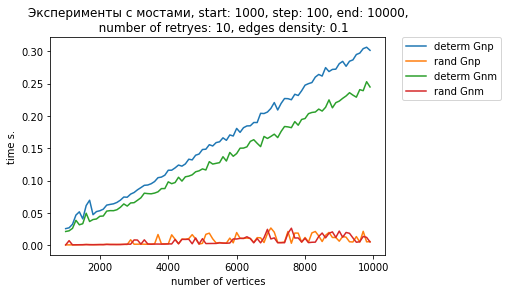

Total time: 784.1055331230164


In [ ]:
print(f"Total time: {check_time(plot_bridges, lambda n: 10*n)}")

### Плотные

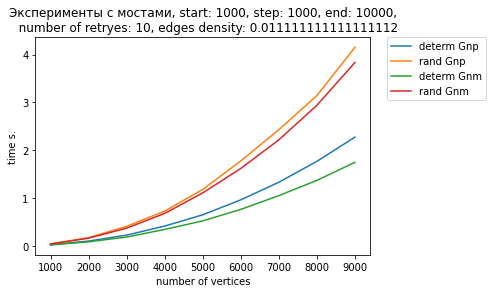

Total time: 683.9881796836853


In [ ]:
print(f"Total time: {check_time(plot_bridges, lambda n: n ** 2/100)}")

## 2-мосты

### Разреженные

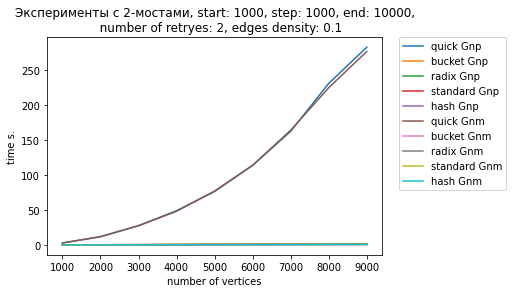

Total time: 3905.4263966083527


In [ ]:
print(f"Total time: {check_time(plot_2bridges, lambda n: 10*n)}")

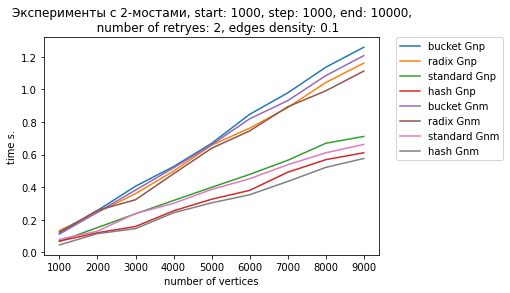

Total time: 79.98582911491394


In [ ]:
print(f"Total time: {check_time(plot_2bridges, lambda n: 10*n)}")

### Плотные

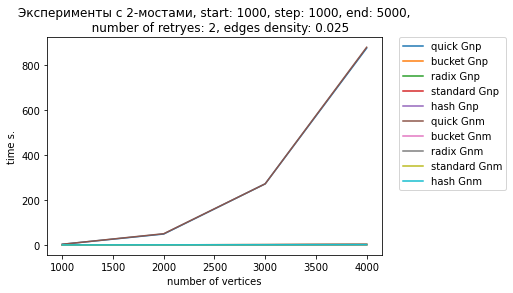

Total time: 4860.036600589752


In [ ]:
print(f"Total time: {check_time(plot_2bridges, lambda n: n ** 2/100)}")

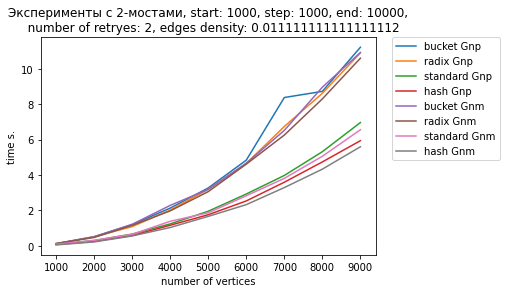

Total time: 526.5740756988525


In [ ]:
print(f"Total time: {check_time(plot_2bridges, lambda n: n ** 2/100)}")

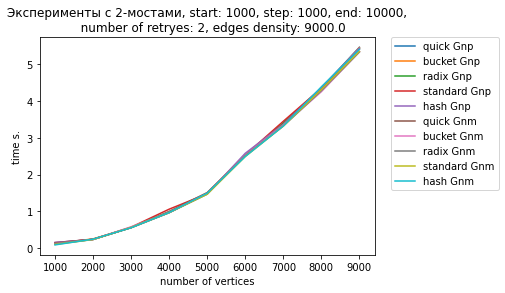

Total time: 380.86330008506775


In [ ]:
print(f"Total time: {check_time(plot_2bridges, lambda n: n/n)}")